#                                     LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as w
w.filterwarnings("ignore")
from scipy.stats import skew

In [2]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# FINDING  THE NULL VALUES

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# FINDING THE OUTLIERS USING BOXPLOT

<AxesSubplot:>

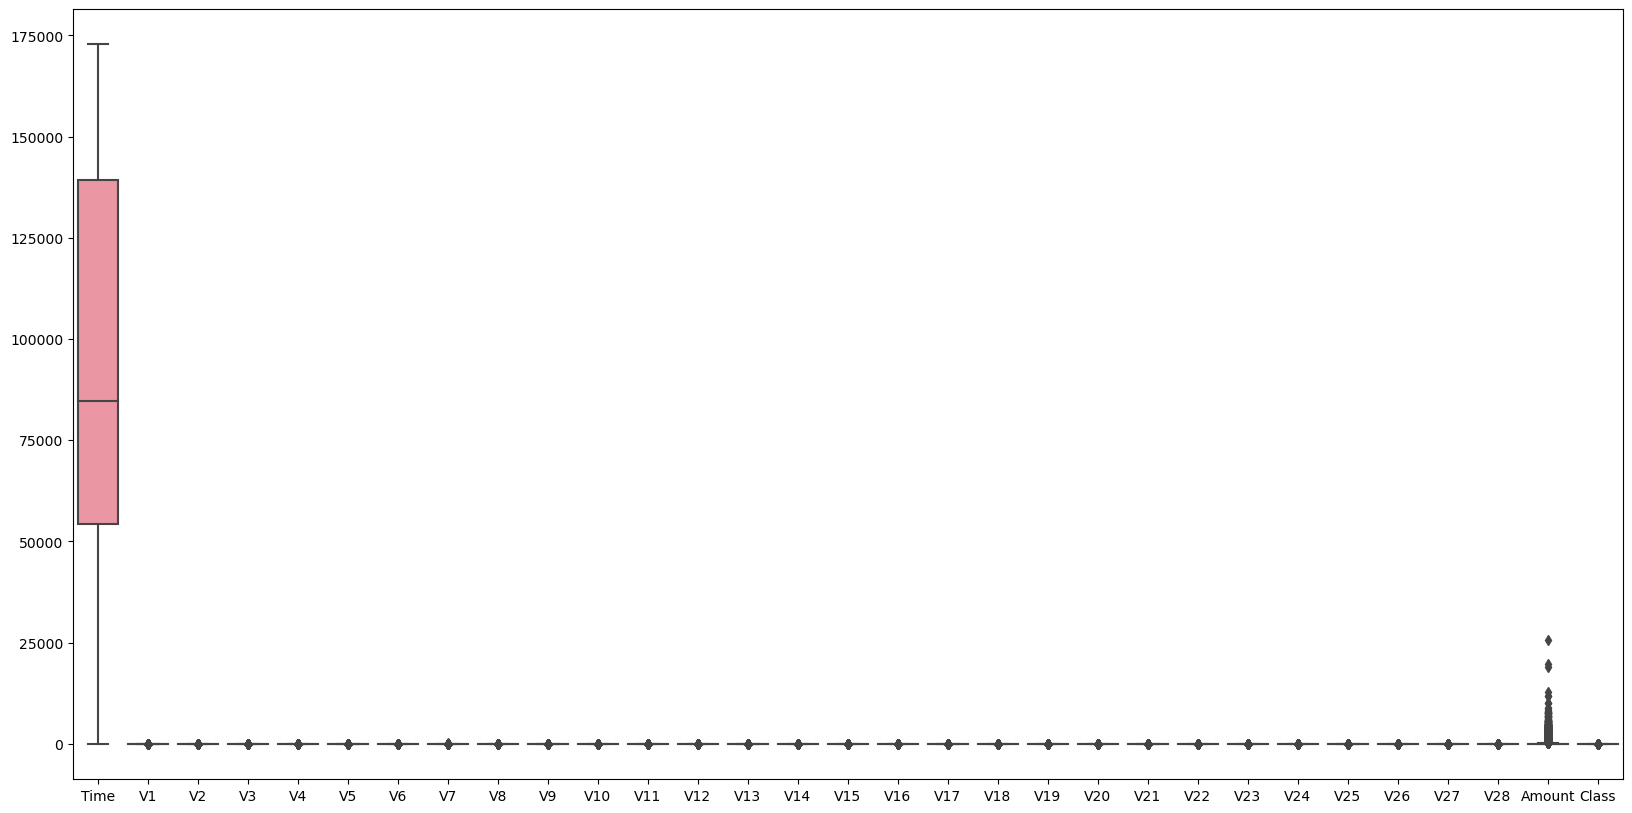

In [4]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

# REMOVING OUTLIERS USING IQR METHOD

In [5]:
Q1=np.quantile(df["Amount"],0.25)
Q3=np.quantile(df["Amount"],0.75)
IQR=Q3-Q1
upperwhisker=Q3+1.5*IQR
lowerwhisker=Q1-1.5*IQR
index=df["Amount"][(df["Amount"]>upperwhisker)|(df["Amount"]<lowerwhisker)].index
df.drop((index),inplace=True)

<AxesSubplot:>

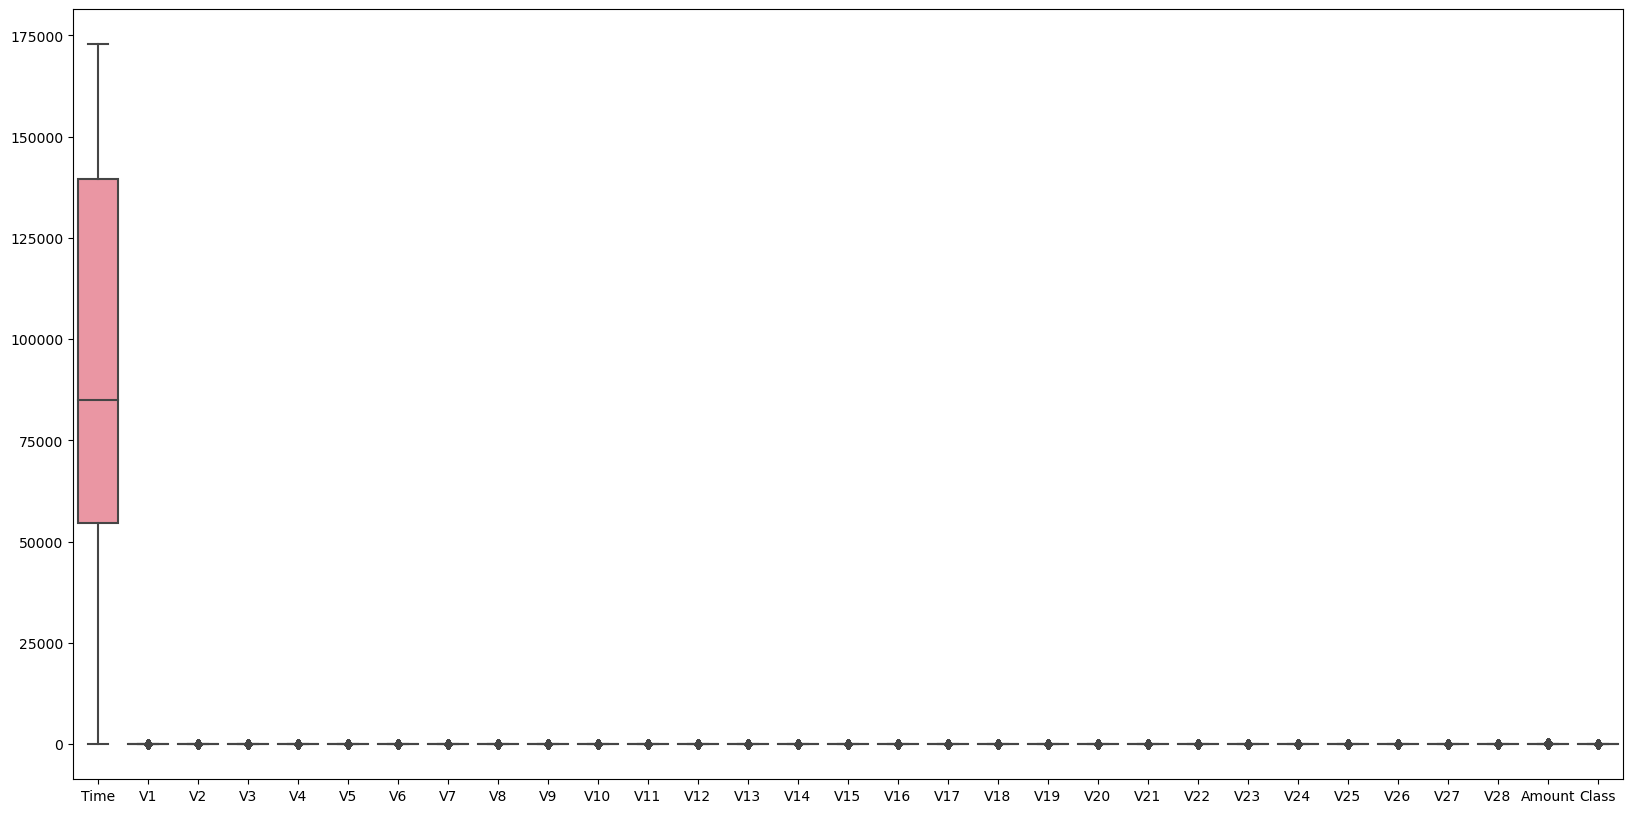

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [7]:
df["Class"].value_counts()

0    252502
1       401
Name: Class, dtype: int64

# CORRELATION OF  DATASET

<AxesSubplot:>

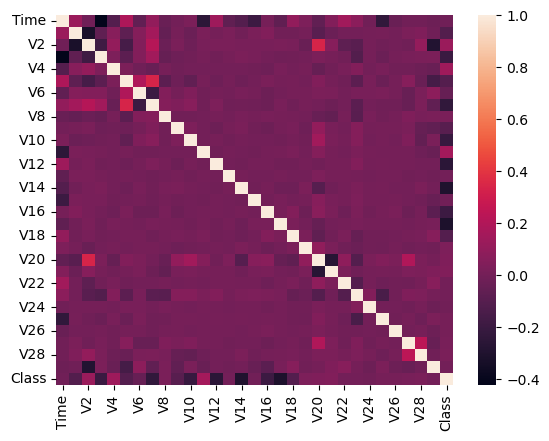

In [8]:
s=df.corr()
sns.heatmap(data=s)


# DROPPING OF COLUMNS NOT NEEDED

In [9]:
df.drop(["V28","V26","V24"],axis=1,inplace=True)

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V23,V25,V27,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.128539,0.133558,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,0.167170,-0.008983,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,0.647376,0.062723,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,-0.206010,0.219422,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.232794,0.253844,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,-0.435870,0.217940,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,1.436807,0.943651,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-0.606624,0.068472,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.265745,0.004455,67.88,0


# SIMPLE IMPUTATION

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
si=SimpleImputer(missing_values=np.nan,strategy="median")
df["Class"]=si.fit_transform(df[["Class"]])

In [13]:
df["Class"].value_counts()

0.0    252502
1.0       401
Name: Class, dtype: int64

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V23,V25,V27,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.128539,0.133558,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,0.167170,-0.008983,2.69,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,0.647376,0.062723,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,-0.206010,0.219422,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.232794,0.253844,3.67,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,-0.435870,0.217940,2.69,0.0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,1.436807,0.943651,0.77,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-0.606624,0.068472,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.265745,0.004455,67.88,0.0


In [15]:
x=df.iloc[:,0:-1]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V22,V23,V25,V27,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.128539,0.133558,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,0.167170,-0.008983,2.69
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,0.647376,0.062723,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,-0.206010,0.219422,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.232794,0.253844,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,-0.435870,0.217940,2.69
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,1.436807,0.943651,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-0.606624,0.068472,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.265745,0.004455,67.88


In [16]:
y=df[["Class"]]
y

,Class
0,0.0
1,0.0
3,0.0
4,0.0
5,0.0
...,...
284801,0.0
284802,0.0
284803,0.0
284804,0.0


# SCALING

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()
sx=ss.fit_transform(x)
sx

array([[-1.99572905, -0.79895498, -0.23441152, ...,  0.24963384,
         0.35382353,  2.71850185],
       [-1.99572905,  0.60285257,  0.02761146, ...,  0.32602582,
        -0.03023398, -0.76554964],
       [-1.99570803, -0.58275846, -0.32134088, ...,  1.2756211 ,
         0.16296739,  2.09913599],
       ...,
       [ 1.63464014, -0.4544899 , -0.2207274 , ..., -1.20413431,
         0.17845891, -0.24150733],
       [ 1.63466115,  1.0026334 , -0.4110402 , ...,  0.52095565,
         0.00597243,  0.78025664],
       [ 1.63466115, -0.18400839,  0.23196227, ..., -1.13004791,
         0.28717151, -0.59221257]])

# TRANING THE DATASET

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25,random_state=0)

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
a_s=accuracy_score(ytest,ypred)
c_m=confusion_matrix(ytest,ypred)
c_r=classification_report(ytest,ypred)
print(f"Accuracy :{a_s}\n{c_m}\n\n{c_r}")

Accuracy :0.9991459209818745
[[63101    20]
 [   34    71]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     63121
         1.0       0.78      0.68      0.72       105

    accuracy                           1.00     63226
   macro avg       0.89      0.84      0.86     63226
weighted avg       1.00      1.00      1.00     63226



In [22]:
print(logreg.score(xtrain,ytrain))
print(logreg.score(xtest,ytest))

0.9991195558765691
0.9991459209818745
